In [1]:
devtools::install_version("Matrix" ,version = "1.6.1.1")

GSE202642 HPC (7 HPC and 4 adjacent healthy)

files on scratch: 

    GSE202642_barcodes.tsv.gz

    GSE202642_features.tsv.gz
    
    GSE202642_matrix.tsv.gz

After unzipping (below) filenames are the same but without .gz

``` bash
cd /scratch/user/s4436039/scdata/GSE202642
ixcpu
gunzip GSE202642_barcodes.tsv.gz
gunzip GSE202642_features.tsv.gz
gunzip GSE202642_matrix.tsv.gz
```

Then renamed to remove prefix - ie. just barcodes.tsv.gz

Errors below in Seurat, does it need it zipped? tried rezipping files with gzip

In [2]:
#load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


In [8]:
OC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE213243/S1_tumour")

In [19]:
colnames(OC.data) <- paste0("GSE213243_S1_tumour_", colnames(OC.data))

In [20]:
#Initialise the Seurat object
OC <- CreateSeuratObject(counts = OC.data, project = "GSE213243", min.cells = 3, min.features = 200)

In [21]:
OC@meta.data$sample_type <- "tumour"
OC@meta.data$cancer_type <- "OC"


In [22]:
OC

An object of class Seurat 
31021 features across 9218 samples within 1 assay 
Active assay: RNA (31021 features, 0 variable features)
 1 layer present: counts

In [24]:
head(OC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type
,<fct>,<dbl>,<int>,<chr>,<chr>
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1,GSE213243,662,511,tumour,OC
GSE213243_S1_tumour_AAACCCACAAGCAATA-1,GSE213243,32151,5905,tumour,OC
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1,GSE213243,12780,4053,tumour,OC
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1,GSE213243,557,402,tumour,OC
GSE213243_S1_tumour_AAACCCATCACAAGAA-1,GSE213243,20366,5209,tumour,OC
GSE213243_S1_tumour_AAACCCATCCGTATAG-1,GSE213243,7222,2839,tumour,OC


In [25]:
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
OC <- NormalizeData(OC)
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
OC <- RunPCA(OC, features = VariableFeatures(object = OC))


Normalizing layer: counts

Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  S100A13, CAPS, LEMD1, CTXN1, CHI3L1, MORN2, SLPI, MDK, IGFBP2, CLU 
	   TSPAN1, DNALI1, SMIM22, IGFBP5, METRN, RSPH1, C9orf116, STXBP6, ASRGL1, SNHG29 
	   CCDC74A, MACROD2, KIF9, KCNK15, C2orf88, PCSK1N, RBP1, TUBB4B, PIFO, AC007906.2 
Negative:  LAPTM5, TYROBP, FCER1G, SRGN, ITGB2, AIF1, RGS1, VIM, CD14, FCGRT 
	   TGFBI, C1QA, C1QC, SPP1, SPI1, MSR1, MS4A7, PLEK, FYB1, ZEB2 
	   ADAP2, LSP1, DAB2, GPNMB, FCGR2A, C1QB, CSF1R, EMP3, APOE, PTPRC 
PC_ 2 
Positive:  C20orf85, CAPSL, C5orf49, MORN5, TUBA4B, CFAP126, FAM183A, WDR38, C1orf194, TEKT1 
	   CFAP45, RIIAD1, PIFO, GPR162, EFCAB1, ROPN1L, ZMYND10, TPPP3, RSPH1, MAP3K19 
	   C11orf88, LRRC6, C9orf135, ZBBX, LKAAEAR1, EFCAB10, C1orf158, LRRIQ1, ODF3B, RSPH4A 
Negative:  CENPW, IGFBP2, MARCKSL1, SNHG29, MKI67, MDK, BIRC5, TPX2, PTTG1, AQP5 
	   HMMR, CHI3L1, LEMD1, CKS2, C

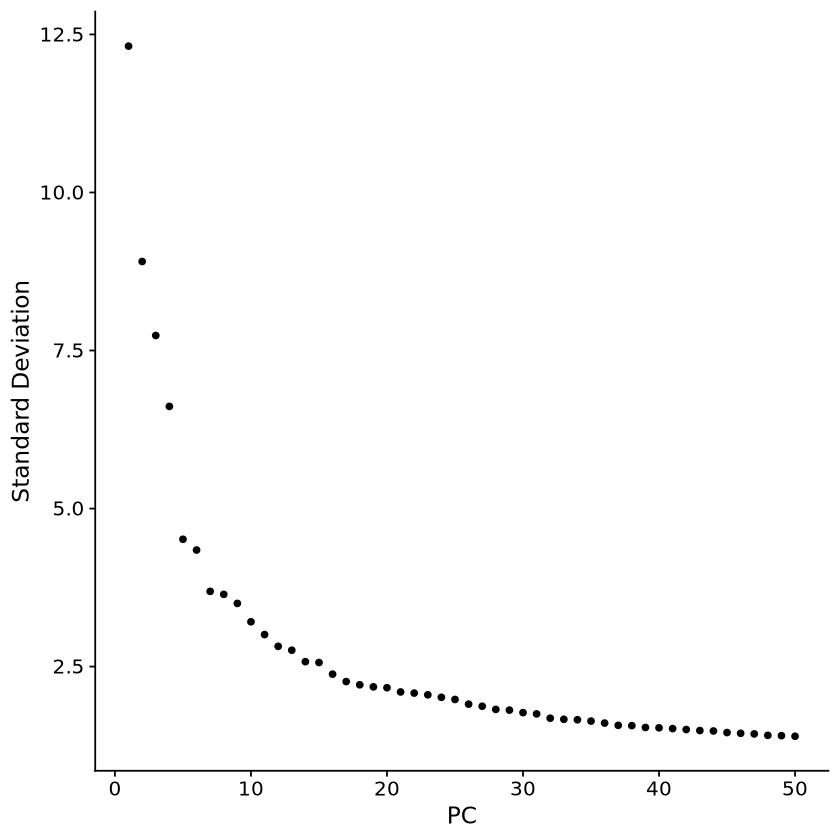

In [28]:
ElbowPlot(OC, ndims=50)

In [31]:
OC <- FindNeighbors(OC, dims = 1:40)


Computing nearest neighbor graph

Computing SNN



In [33]:
OC <- RunUMAP(OC, dims = 1:40)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:48:16 UMAP embedding parameters a = 0.9922 b = 1.112

09:48:16 Read 9218 rows and found 40 numeric columns

09:48:16 Using Annoy for neighbor search, n_neighbors = 30

09:48:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:48:17 Writing NN index file to temp file /scratch/temp/8654578/Rtmp9Mpztx/file3dfceb137bce21

09:48:17 Searching Annoy index using 1 thread, search_k = 3000

09:48:19 Annoy recall = 100%

09:48:19 Commencing smooth kNN distance calibration using 1 thread
 with t

In [35]:
OC <- FindClusters(OC, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9218
Number of edges: 339461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8844
Number of communities: 14
Elapsed time: 1 seconds


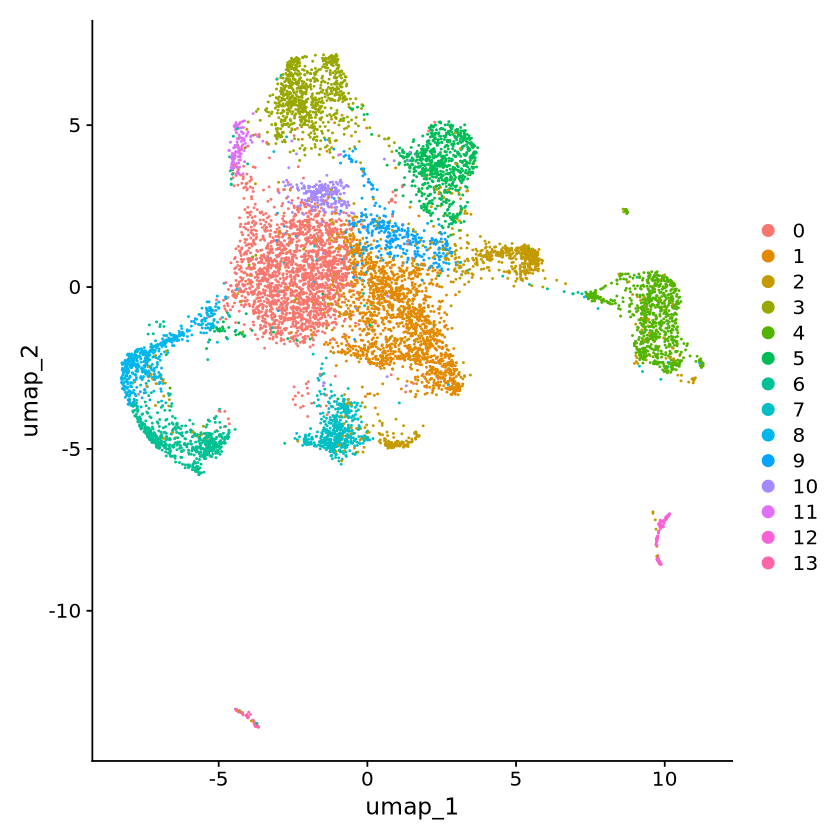

In [36]:
DimPlot(OC, reduction = "umap")


In [37]:
library(dplyr)

In [39]:
# OC.markers <- FindAllMarkers(OC, only.pos = TRUE)
# OC.markers %>%
#     group_by(cluster) %>%
#     dplyr::filter(avg_log2FC > 1)

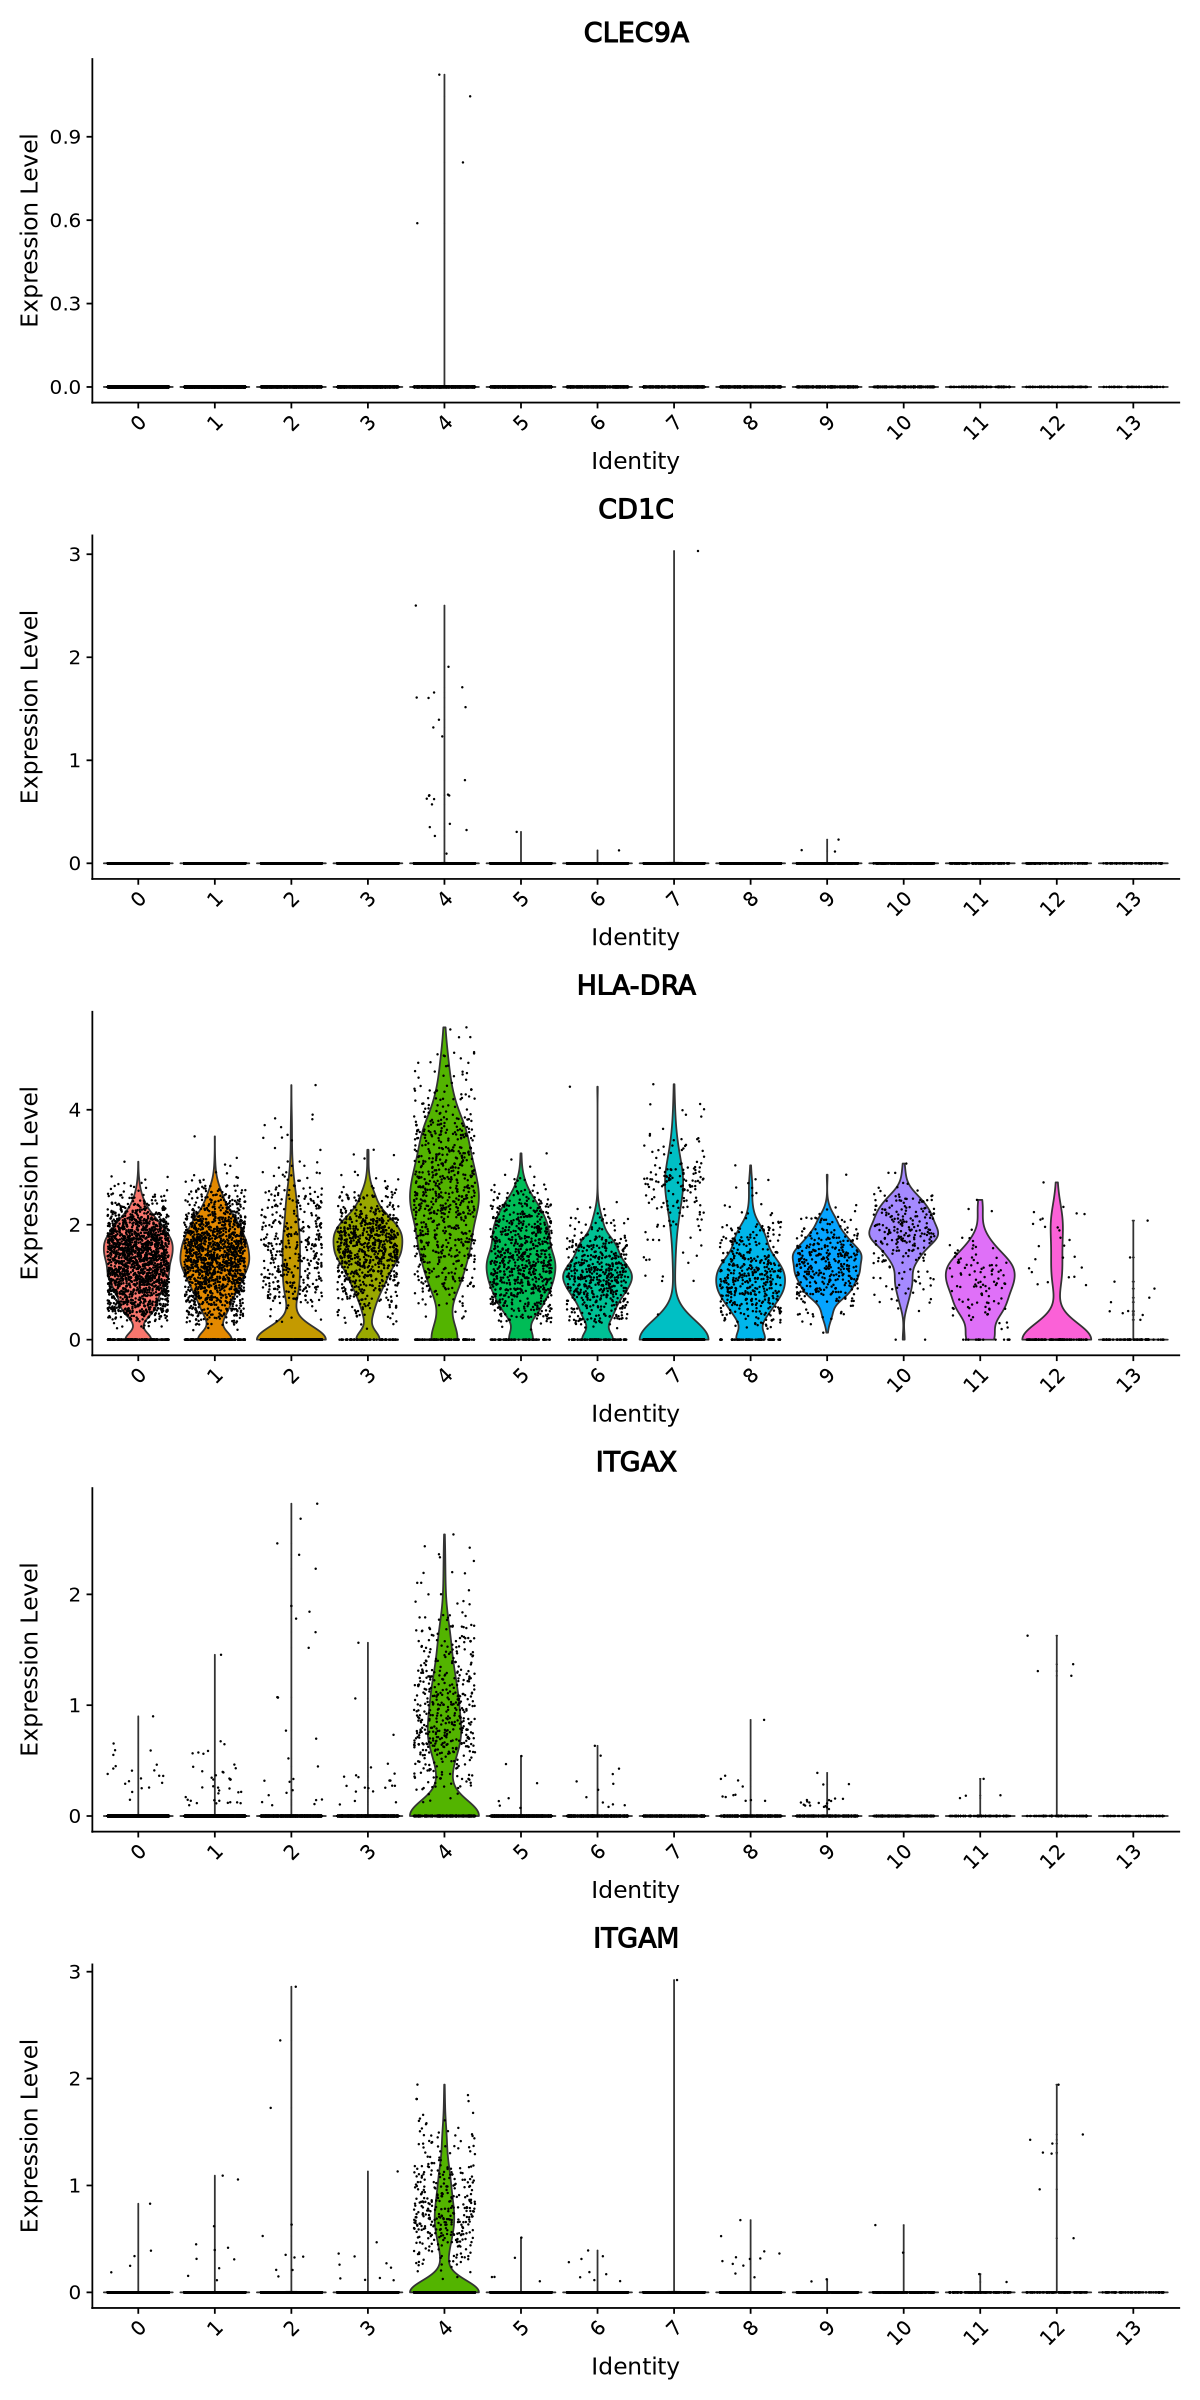

In [42]:
options(repr.plot.height=20, repr.plot.width=10)
VlnPlot(OC, features = c("CLEC9A", "CD1C", "HLA-DRA", "ITGAX", "ITGAM"), ncol=1)


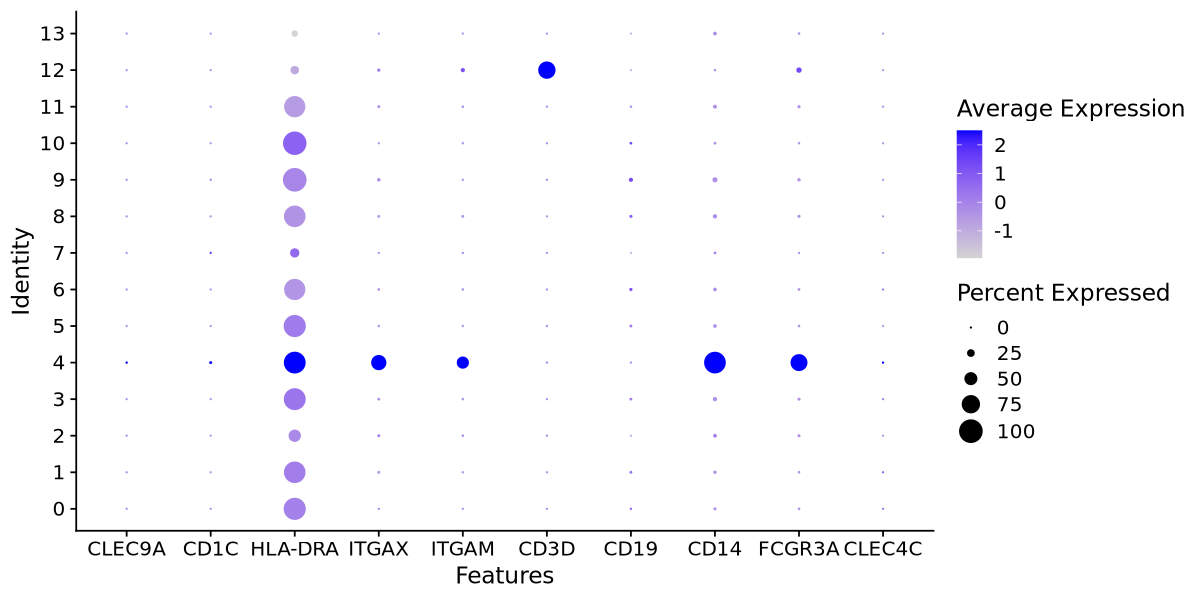

In [49]:
options(repr.plot.height=5, repr.plot.width=10)

DotPlot(OC, features = c("CLEC9A", "CD1C", "HLA-DRA", "ITGAX", "ITGAM", "CD3D", "CD19", "CD14", "FCGR3A", "CLEC4C"))


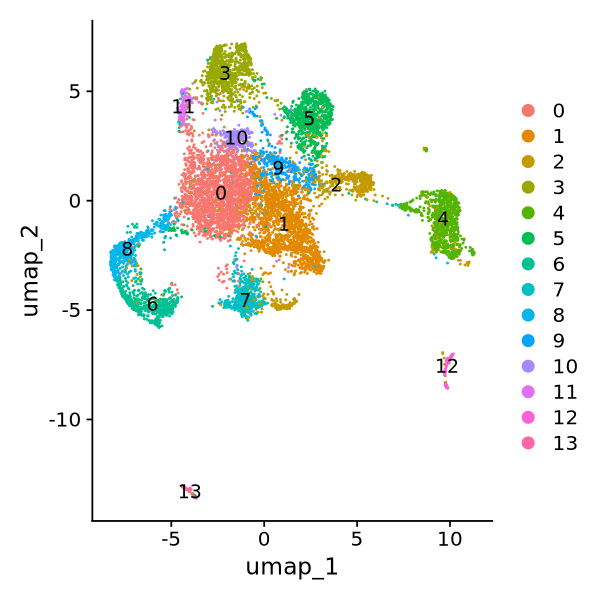

In [54]:
options(repr.plot.height=5, repr.plot.width=5)

DimPlot(OC, label=TRUE)

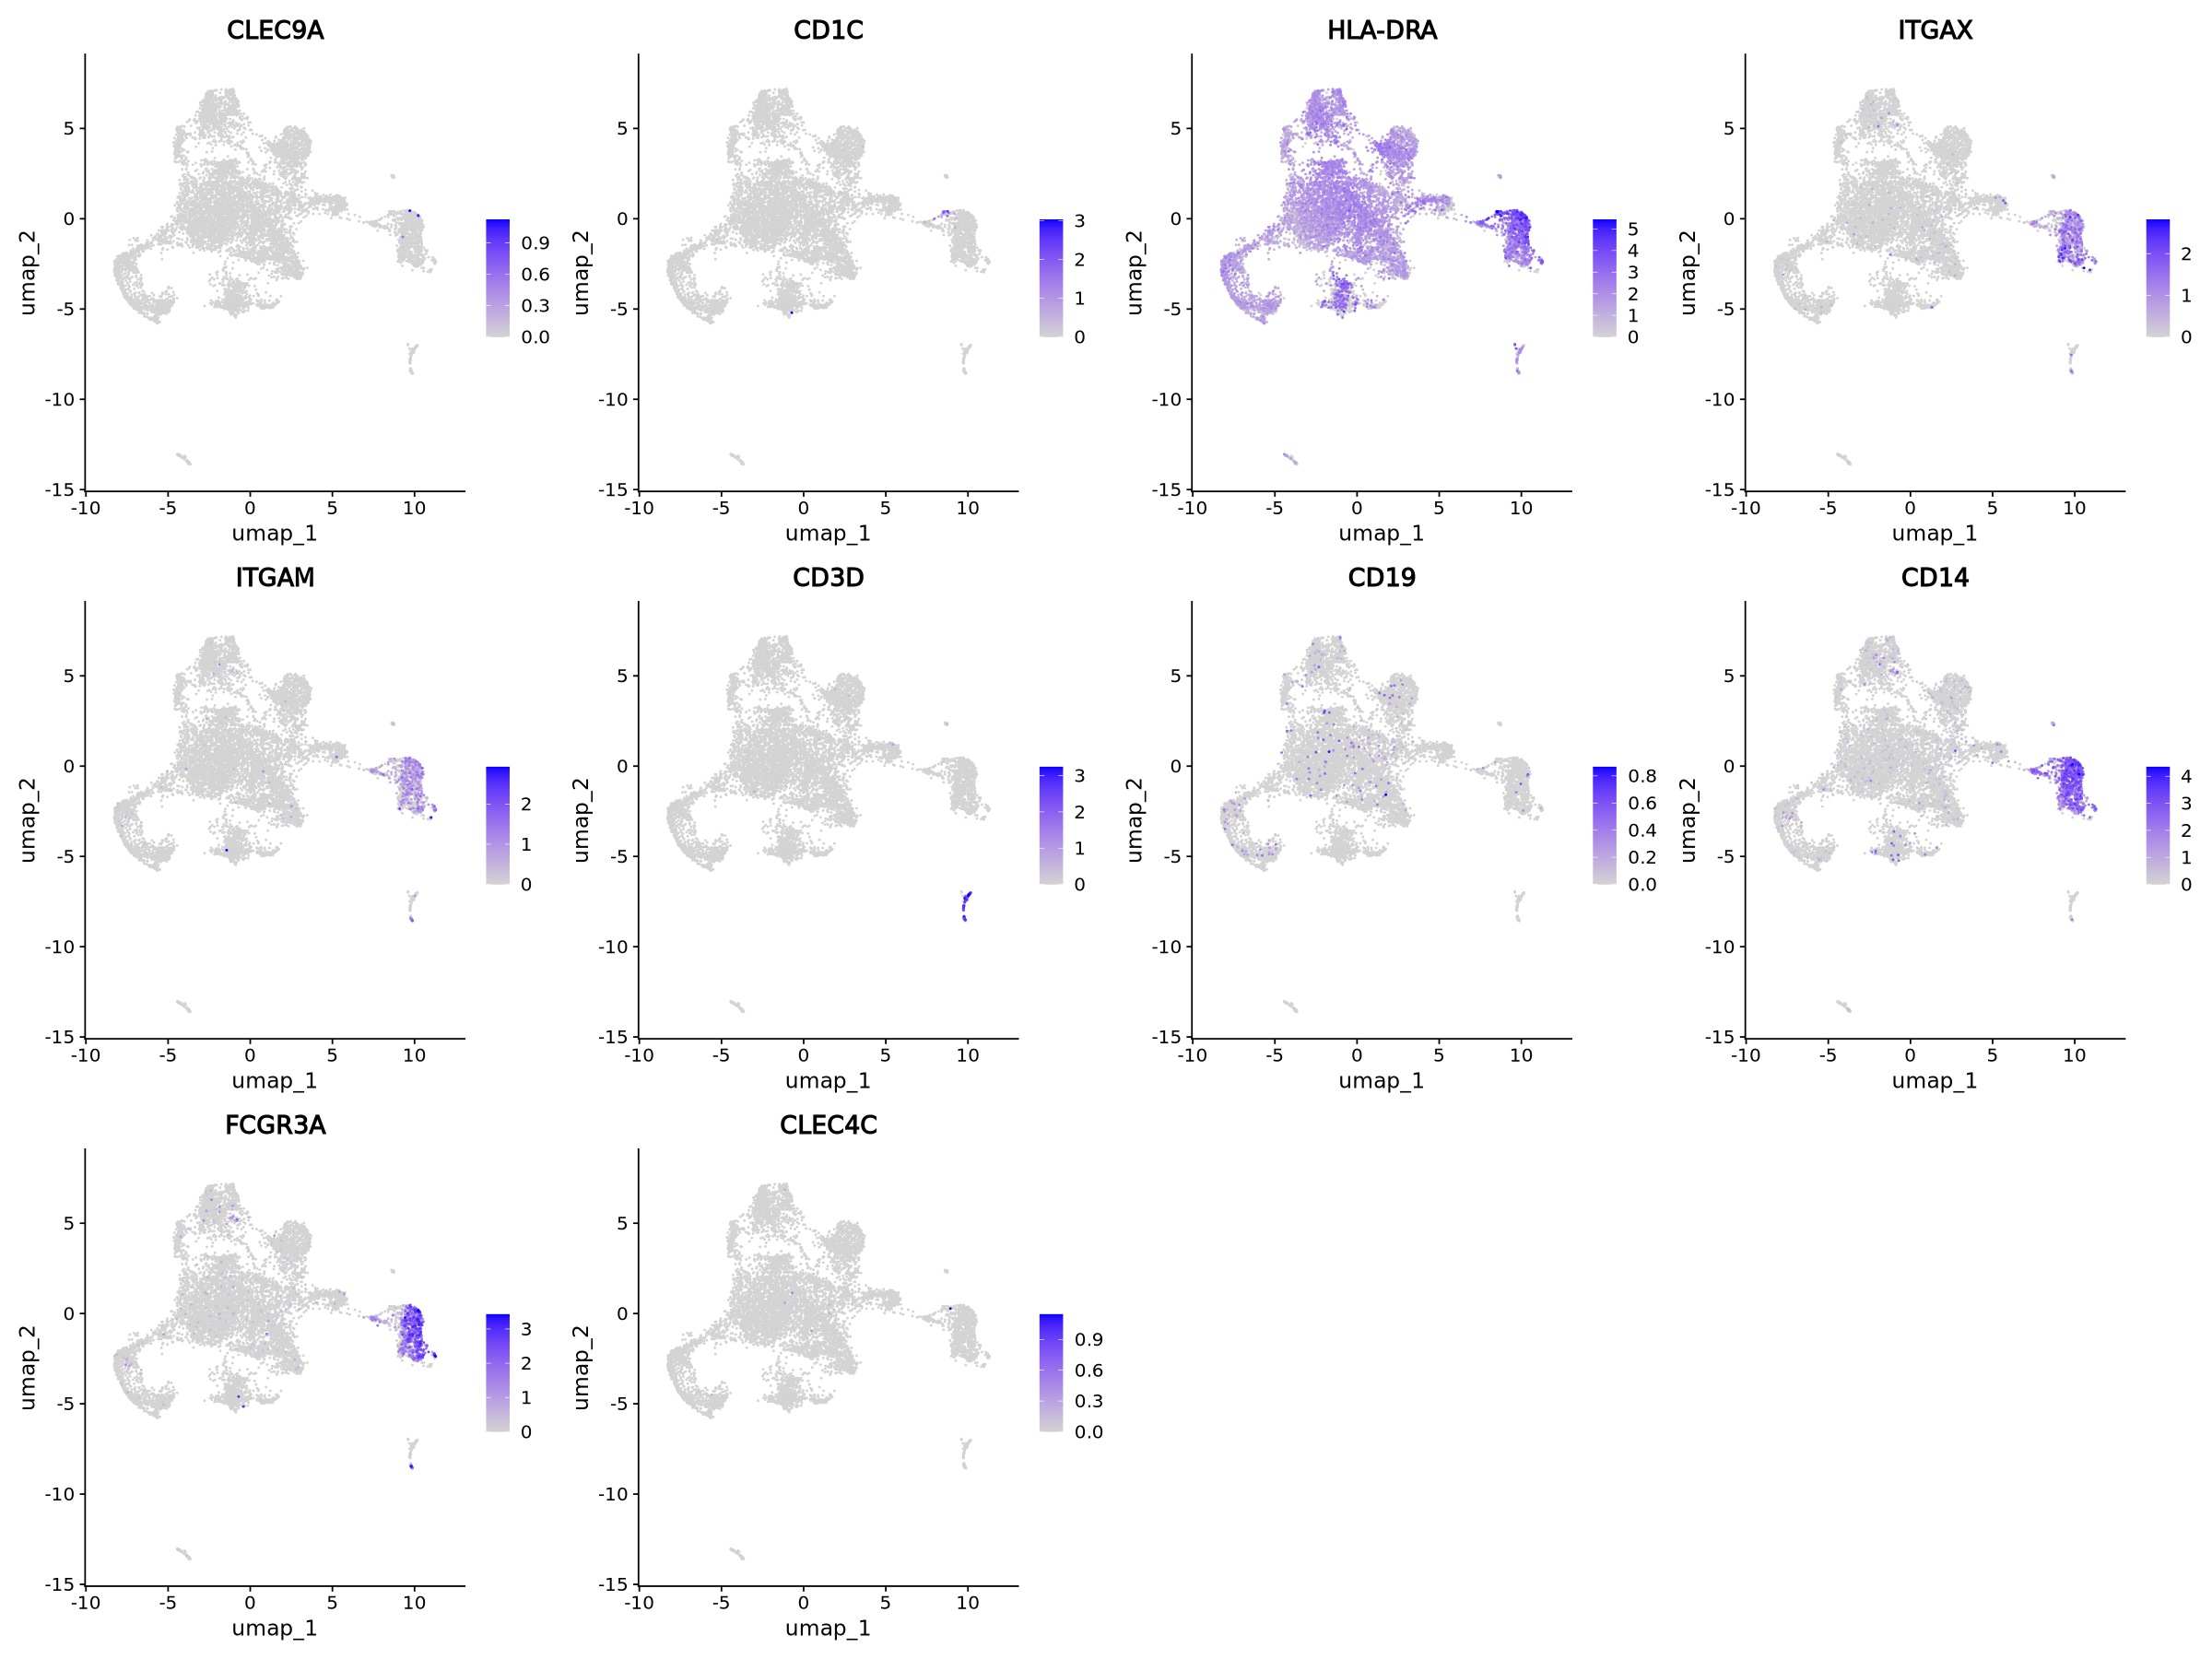

In [52]:
options(repr.plot.height=15, repr.plot.width=20)

FeaturePlot(OC, features = c("CLEC9A", "CD1C", "HLA-DRA", "ITGAX", "ITGAM", "CD3D", "CD19", "CD14", "FCGR3A", "CLEC4C"), order = TRUE)


In [55]:
head(OC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,percent.mt,RNA_snn_res.1,seurat_clusters,RNA_snn_res.0.5
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>
GSE213243_S1_tumour_AAACCCAAGCATGTTC-1,GSE213243,662,511,tumour,OC,3.172205,10,7,7
GSE213243_S1_tumour_AAACCCACAAGCAATA-1,GSE213243,32151,5905,tumour,OC,14.540761,4,0,0
GSE213243_S1_tumour_AAACCCAGTCGTCAGC-1,GSE213243,12780,4053,tumour,OC,10.242567,9,8,8
GSE213243_S1_tumour_AAACCCAGTGACGTCC-1,GSE213243,557,402,tumour,OC,8.078995,10,7,7
GSE213243_S1_tumour_AAACCCATCACAAGAA-1,GSE213243,20366,5209,tumour,OC,16.267308,4,0,0
GSE213243_S1_tumour_AAACCCATCCGTATAG-1,GSE213243,7222,2839,tumour,OC,15.951260,9,8,8


In [56]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.5 %in% c("4"))

In [57]:
myeloid_OC

An object of class Seurat 
31021 features across 790 samples within 1 assay 
Active assay: RNA (31021 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [62]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE213243/S1_tumour_myeloid.RDS")

In [63]:
x <- merge(myeloid_OC, c(myeloid_OC, myeloid_OC))

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [64]:
x

An object of class Seurat 
31021 features across 2370 samples within 1 assay 
Active assay: RNA (31021 features, 2000 variable features)
 9 layers present: counts.1, counts.2, counts.3, data.1, scale.data.1, data.2, scale.data.2, data.3, scale.data.3